In [1]:
"""
Runs parity checker without regularization and with pruning.
Random pruning and rewiring parameters. 
With p = .10 probability, prunes the coldest head or tail, else with 1-p=.90 pruns randomly.
With p = .30 probability, rewires with the hottest head or tail
tau = 4.5
"""

"Runs parity checker without regularization and with pruning.\nRandom pruning and rewiring parameters. \nWith p = .10 probability, prunes the coldest head or tail, else with 1-p=.90 pruns randomly.\nWith p = .30 probability, rewires with the hottest head or tail\ntau = 4.5\n"

In [2]:
# import 

#using Pkg
#Pkg.add("Revise")

In [3]:
using Revise
includet("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [4]:
n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 10^5 # number of training iterations

100000

In [5]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)

(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [6]:
trainidx, testidx = mlp.gen_data(n, ntest)
xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 1 0 … 0 1], [1 1 … 1 0], [1 0 … 1 0; 1 1 … 0 1; … ; 1 0 … 1 0; 1 0 … 1 1], [1 1 … 0 1])

In [7]:
@time w, b, losstrn, losstst, rho = mlp.backprop(w, b, niter, trainidx, testidx, n, ntest, nbatch, (xdim, h1, h2, h3, ydim), LR = 0.1, p = 0.10);

┣                    ┫ [0.00%, 2/100000, 00:05/70:44:19, 5.09s/i] 

Pruning: (8, 33)
Pruning: (9, 31)
Pruning: (40, 61)
Pruning: (33, 59)
Pruning: (29, 54)
Pruning: (7, 19)
Pruning: (15, 58)
Pruning: (46, 65)
Pruning: (32, 53)


┣▏                   ┫ [0.86%, 862/100000, 00:06/11:47, 859.98i/s] 

Pruning: (39, 77)


┣▍                   ┫ [1.98%, 1978/100000, 00:07/05:59, 1115.86i/s] 

Pruning: (59, 79)


┣▊                   ┫ [4.10%, 4100/100000, 00:09/03:42, 1048.71i/s] 

Pruning: (11, 30)


┣█▍                  ┫ [7.36%, 7359/100000, 00:12/02:45, 1062.35i/s] 

Pruning: (51, 63)


┣███▏                ┫ [16.05%, 16047/100000, 00:19/01:59, 1128.26i/s] 

Pruning: (46, 76)


┣██████▍             ┫ [32.30%, 32295/100000, 00:33/01:43, 1064.83i/s] 

Pruning: (2, 26)


┣████████████▉       ┫ [64.85%, 64854/100000, 01:00/01:33, 1178.48i/s] 

Pruning: (53, 68)


┣████████████████████┫ [100.00%, 100000/100000, 01:28/01:28, 1134.59i/s] 


 90.403492 seconds (141.05 M allocations: 72.276 GiB, 17.89% gc time)


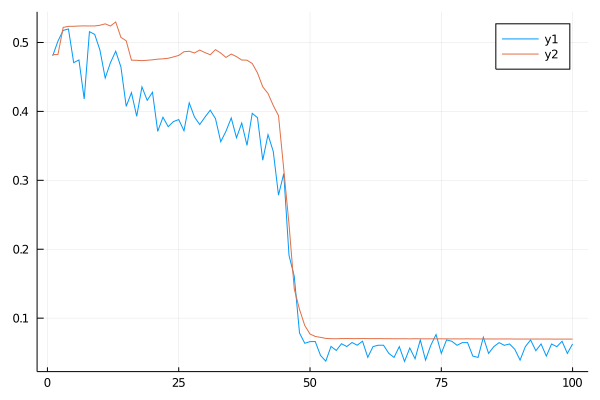

In [8]:
plot(losstrn)
plot!(losstst) 

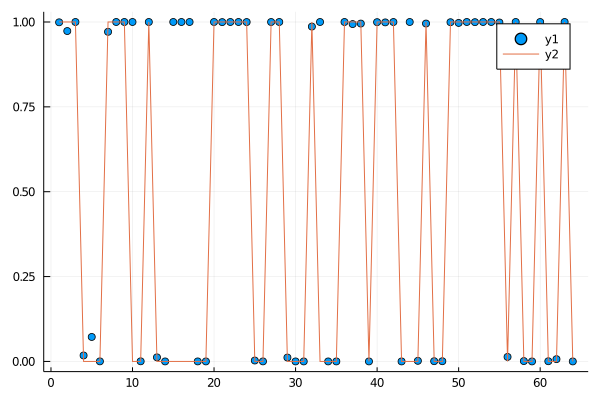

In [9]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [10]:
# accuracy
function acc(x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

acc (generic function with 1 method)

In [11]:
acc(xtrn,ytrn),acc(xtst,ytst)

(0.9416689924644153, 0.927734375)

In [12]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    trainidx, testidx = mlp.gen_data(n, ntest)
    xtrn, ytrn, xtst, ytst = mlp.split_data(trainidx, testidx, n, ntest)
    sumtrn += acc(xtrn,ytrn); sumtst += acc(xtst,ytst)
end

(sumtrn/100,sumtst/100) # (overfitted but works)

(0.9402037398827803, 0.93802734375)

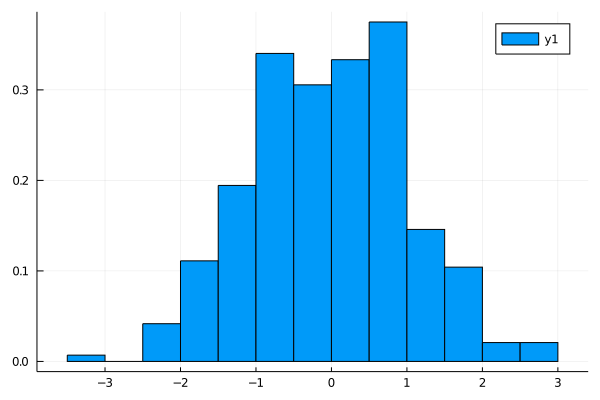

In [13]:
# distribution of weights
histogram(reshape(w1,:,1)[:,1],normalize=:pdf)

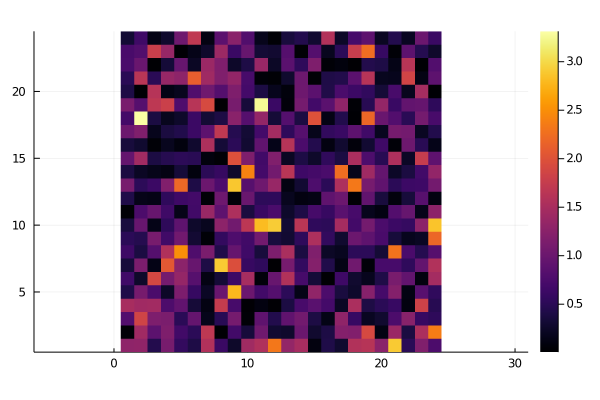

In [14]:
heatmap(abs.(value(w2)),aspect_ratio=1)

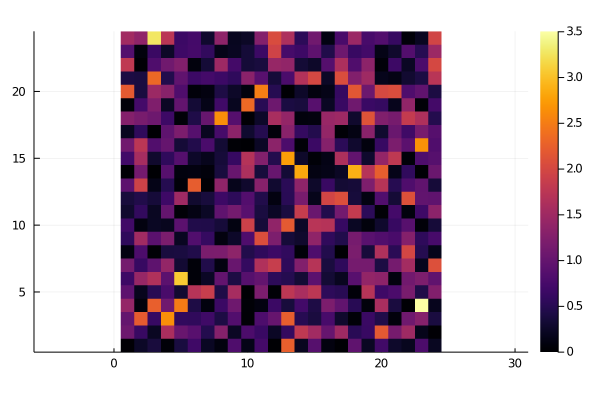

In [15]:
heatmap(abs.(value(w3)),aspect_ratio=1)

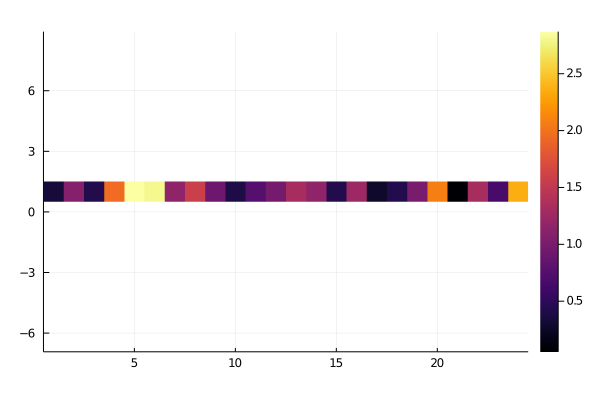

In [16]:
heatmap(abs.(value(w4)),aspect_ratio=1)

In [35]:
includet("../codebase/metrics.jl")
includet("../codebase/rewiring.jl")
using .metrics, .rewiring
A = computeKernel(w, (xdim, h1, h2, h3, ydim))
metrics.net_density(A)

0.10245098039215686

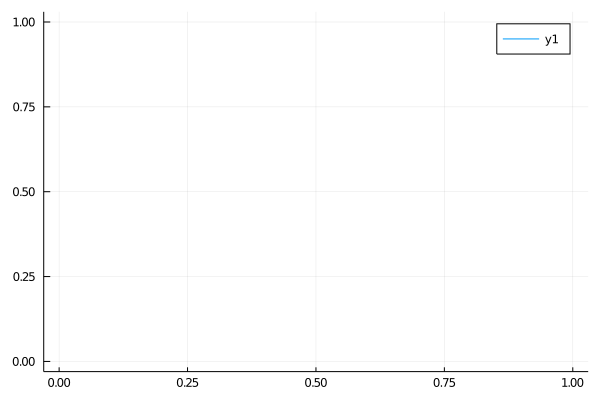